<a href="https://colab.research.google.com/github/HarikaSatti06112001/advanced-data-mining-assignments/blob/main/CMPE256_A2_FEDFUNDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUCCESSFULLY RUN FEDFUNDS**


In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random 
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats
import seaborn as sns


%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 40

In [ ]:
! pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FEDFUNDS


In [ ]:
#FEDFUNDS

FEDFUNDS = pd.read_csv("/content/FEDFUNDS_2022-03-31.csv",parse_dates=['Date'], dayfirst=True)
FEDFUNDS = FEDFUNDS.set_index('Date')
FEDFUNDS.head()


,FEDFUNDS
Date,
1954-01-07,0.80
1954-01-08,1.22
1954-01-09,1.07
1954-01-10,0.85
1954-01-11,0.83


<h3> Check for nulls </H3>

In [ ]:
FEDFUNDS.isnull().sum() ## missing values

FEDFUNDS    0
dtype: int64

In [ ]:
FEDFUNDS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 1954-01-07 to 2022-01-03
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  813 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


In [ ]:
FEDFUNDS.columns

Index(['FEDFUNDS'], dtype='object')

Text(0, 0.5, 'Frequency')

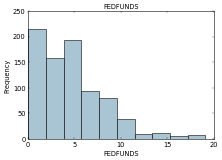

In [ ]:
fig, ax = plt.subplots()
FEDFUNDS['FEDFUNDS'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('FEDFUNDS', fontsize=12)
ax.set_xlabel('FEDFUNDS', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

<h5> Create Gold Price Bins - divide price into five quantiles (0, 25%, 50%, 75%, and 100%) </h5>

In [ ]:
FEDFUNDS['FEDFUNDS_bin_round'] = np.array(np.floor(
                              np.array(FEDFUNDS['FEDFUNDS']) / 10.))
FEDFUNDS[['FEDFUNDS', 'FEDFUNDS_bin_round']].iloc[1071:2076]

,FEDFUNDS,FEDFUNDS_bin_round
Date,,


In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = FEDFUNDS['FEDFUNDS'].quantile(quantile_list)
quantiles

0.00     0.05
0.25     1.76
0.50     4.16
0.75     6.37
1.00    19.10
Name: FEDFUNDS, dtype: float64

Text(0, 0.5, 'Frequency')

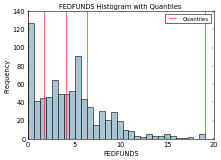

In [ ]:
fig, ax = plt.subplots()
FEDFUNDS['FEDFUNDS'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('FEDFUNDS Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('FEDFUNDS', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
FEDFUNDS['FEDFUNDS_log'] = np.log((1+ FEDFUNDS['FEDFUNDS']))
FEDFUNDS[[ 'FEDFUNDS', 'FEDFUNDS_log']].iloc[4:9]

,FEDFUNDS,FEDFUNDS_log
Date,,
1954-01-11,0.83,0.604316
1954-01-12,1.28,0.824175
1955-01-01,1.39,0.871293
1955-01-02,1.29,0.828552
1955-01-03,1.35,0.854415


In [ ]:
FEDFUNDS = np.array(FEDFUNDS['FEDFUNDS'])
FEDFUNDS_clean = FEDFUNDS[~np.isnan(FEDFUNDS)]
l, opt_lambda = spstats.boxcox(FEDFUNDS)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.47353773418670575


In [ ]:
! pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#fedfunds

In [ ]:
# USD Index
# Trade Weighted U.S. Dollar Index: Broad, Goods and Services (DTWEXBGS)
# https://fred.stlouisfed.org/series/DTWEXBGS 
usdFedFundsDF = pd.read_csv("FEDFUNDS_2022-03-31.csv",parse_dates=['Date'], dayfirst=True)


usdFedFundsDF = usdFedFundsDF.set_index('Date')

usdFedFundsDF.head() 

,FEDFUNDS
Date,
1954-01-07,0.80
1954-01-08,1.22
1954-01-09,1.07
1954-01-10,0.85
1954-01-11,0.83


In [ ]:
usdFedFundsDF.tail(10)

,FEDFUNDS
Date,
2021-01-06,0.08
2021-01-07,0.10
2021-01-08,0.09
2021-01-09,0.08
2021-01-10,0.08
2021-01-11,0.08
2021-01-12,0.08
2022-01-01,0.08
2022-01-02,0.08


In [ ]:
usdFedFundsDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 1954-01-07 to 2022-01-03
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  813 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


In [ ]:
usdFedFundsDF.isnull().sum() ## missing values

FEDFUNDS    0
dtype: int64

In [ ]:
# Interest
# 10-Year Treasury Constant Maturity Rate (DGS10)
# https://fred.stlouisfed.org/series/DGS10

### https://fred.stlouisfed.org/series/FEDFUNDS
interestRateDF = pd.read_csv("/content/FEDFUNDS_2022-03-31.csv", dayfirst=True)
interestRateDF = interestRateDF.rename(columns={"DATE":'Date'})

interestRateDF = interestRateDF.set_index('Date')

interestRateDF.head() 

,FEDFUNDS
Date,
7/1/1954,0.80
8/1/1954,1.22
9/1/1954,1.07
10/1/1954,0.85
11/1/1954,0.83


In [ ]:
interestRateDF.tail(10)

,FEDFUNDS
Date,
6/1/2021,0.08
7/1/2021,0.10
8/1/2021,0.09
9/1/2021,0.08
10/1/2021,0.08
11/1/2021,0.08
12/1/2021,0.08
1/1/2022,0.08
2/1/2022,0.08


In [ ]:
interestRateDF.isnull().sum() ## missing values

FEDFUNDS    0
dtype: int64

In [ ]:
interestRateDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 7/1/1954 to 3/1/2022
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  813 non-null    float64
dtypes: float64(1)
memory usage: 12.7+ KB


In [83]:
interestRateDF.isnull().sum() ## missing values

FEDFUNDS    0
dtype: int64

In [87]:
from scipy import stats

FEDFUNDS = pd.DataFrame(FEDFUNDS)
print(FEDFUNDS)


stat,p = stats.normaltest(FEDFUNDS)

print("FEDFUNDS Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')

        0
0    0.80
1    1.22
2    1.07
3    0.85
4    0.83
..    ...
808  0.08
809  0.08
810  0.08
811  0.08
812  0.20

[813 rows x 1 columns]
FEDFUNDS Statistics = 135.118, p=0.000
Data looks non-Gaussian (reject null hypothesis)


In [88]:
FEDFUNDS.describe()

,0
count,813.000000
mean,4.621968
std,3.626838
min,0.050000
25%,1.760000
50%,4.160000
75%,6.370000
max,19.100000


In [89]:
from scipy import stats

FEDFUNDS= pd.DataFrame(FEDFUNDS)
print(FEDFUNDS)


stat,p = stats.normaltest(FEDFUNDS)

print("FEDFUNDS Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')

        0
0    0.80
1    1.22
2    1.07
3    0.85
4    0.83
..    ...
808  0.08
809  0.08
810  0.08
811  0.08
812  0.20

[813 rows x 1 columns]
FEDFUNDS Statistics = 135.118, p=0.000
Data looks non-Gaussian (reject null hypothesis)


FEDFUNDS: Kurtosis of normal distribution: [1.49369574]
FEDFUNDS:Skewness of normal distribution: [1.04898586]


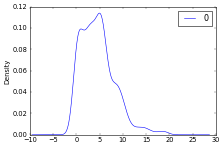

In [90]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis

FEDFUNDS.plot(kind = 'density') 

print('FEDFUNDS: Kurtosis of normal distribution: {}'.format(stats.kurtosis(FEDFUNDS)))
print('FEDFUNDS:Skewness of normal distribution: {}'.format(stats.skew(FEDFUNDS)))